
1.  Price prediction with all regression models linear regression,polynomial,SVR,Random Regressor, Decison Tree Regressor



2.  Columns to use neighbourhood_group,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count

3. first method  is to fill with zero

4.  second method check if the same host id has other properties with reviews_per_month take mean only if num_of_reviews is greater than 0 and fill nans or if not then fill with zero



 .  lak nan values in reviews_per_month

.   first check if num_of_reviews>0 if no fill   with zero else find the host_id. Find all properties of this host and do mean of reviews_per_month to fill the nan value

In [1]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/AB_NYC_2019.csv')
df

In [3]:
df.dropna(subset=['host_name'], inplace=True)

In [4]:
df.dropna(subset=['name'], inplace=True)

In [5]:
df.drop(columns=['last_review'], inplace=True)

In [6]:
df['reviews_per_month'].fillna(0, inplace=True)

In [ ]:
df.isna().sum()

In [8]:
df.shape

(48858, 15)

In [9]:
X=df[['longitude']]
y=df['price']

In [10]:
X1=df.drop(columns=['id','name','host_id','host_name','price','neighbourhood','availability_365'],axis=1)
y1 = df['price']

In [ ]:
X

In [12]:
X.shape

(48858, 1)

In [13]:
y.shape

(48858,)

In [14]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0,3])], remainder='passthrough')
X1 = ct.fit_transform(X1)
X1

array([[ 0.  ,  1.  ,  0.  , ...,  9.  ,  0.21,  6.  ],
       [ 0.  ,  0.  ,  1.  , ..., 45.  ,  0.38,  2.  ],
       [ 0.  ,  0.  ,  1.  , ...,  0.  ,  0.  ,  1.  ],
       ...,
       [ 0.  ,  0.  ,  1.  , ...,  0.  ,  0.  ,  1.  ],
       [ 0.  ,  0.  ,  1.  , ...,  0.  ,  0.  ,  6.  ],
       [ 0.  ,  0.  ,  1.  , ...,  0.  ,  0.  ,  1.  ]])

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [ ]:
X_train

In [ ]:
X_test

In [19]:
y_train

9249      89
13034    100
40823     60
45585    200
39669    240
        ... 
43760    119
32547    175
5196     180
12191     50
33039    140
Name: price, Length: 39086, dtype: int64

In [20]:
y_test

17801    145
25981     42
15521     70
4341     151
5670      57
        ... 
42072    100
6477     112
28814     35
5892      75
33466    170
Name: price, Length: 9772, dtype: int64

In [21]:
X_train.shape

(39086, 1)

In [22]:
y_train.shape

(39086,)

In [23]:
y_test.shape

(9772,)

In [24]:
X_test.shape


(9772, 1)

With Linear Regression

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
reg=LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [27]:
print(reg.coef_,reg.intercept_)

[-771.88434766] -56930.46504530944


In [28]:
prediction = reg.predict(X_test)

(0.0, 400.0)

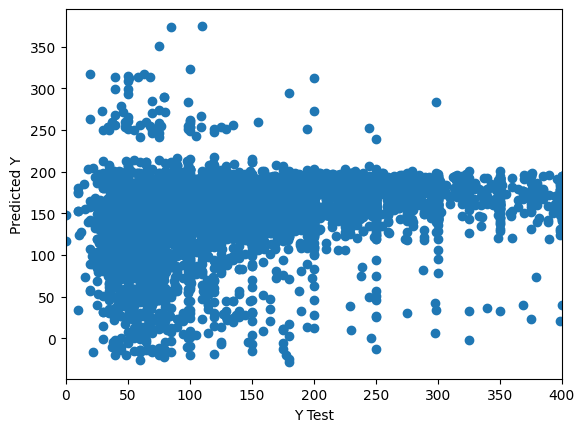

In [29]:
import matplotlib.pyplot as plt

plt.scatter(y_test,prediction)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.xlim(0,400)

Predicting Using Polynomial Regressor

In [30]:
from sklearn.preprocessing import PolynomialFeatures

In [31]:
# Creating polynomial features
poly = PolynomialFeatures(degree = 4)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

Fit a polynomial regression model to your training data

In [32]:
model = LinearRegression()
model.fit(X_train_poly, X_train)

LinearRegression()

Making predictions on both the training and testing data

In [33]:
y_train_pred = model.predict(X_train_poly)
y_test_pred = model.predict(X_test_poly)

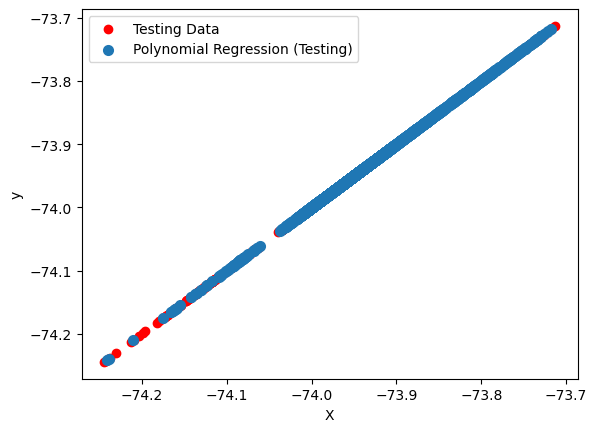

In [34]:
plt.scatter(X_train, y_train_pred, label='Testing Data', c='r')
plt.scatter(X_test, y_test_pred, label='Polynomial Regression (Testing)', linewidth=2)
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

Prediction Using SVR

In [35]:
from sklearn.preprocessing import StandardScaler
import numpy as np

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [36]:
print(X_train_scaled)

[[-0.96763664]
 [ 0.40539039]
 [ 1.12726877]
 ...
 [-0.05772603]
 [ 0.74554592]
 [ 0.25413761]]


In [37]:
from sklearn.svm import SVR
svr_regressor = SVR(kernel='linear', C=1.0, gamma='scale')
svr_regressor.fit(X_train_scaled, y_train)
y_test_pred = svr_regressor.predict(X_test_scaled)

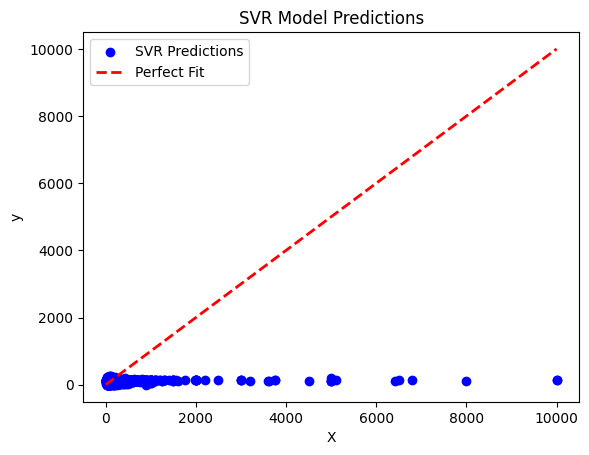

In [38]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_test_pred, color='blue', label='SVR Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', lw=2, label='Perfect Fit')


plt.xlabel('X')
plt.ylabel('y')
plt.title('SVR Model Predictions')
plt.legend()
plt.show()


Prediction using random regressor

In [39]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)

prediction = regressor.predict(X_test)

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))
print('R2 score:', np.sqrt(metrics.r2_score(y_test, prediction)))

Mean Absolute Error: 102.69088267663435
Mean Squared Error: 94999.71586978782
Root Mean Squared Error: 308.2202392280361
R2 score: nan


<ipython-input-39-f23ce99a817d>:11: RuntimeWarning: invalid value encountered in sqrt
  print('R2 score:', np.sqrt(metrics.r2_score(y_test, prediction)))


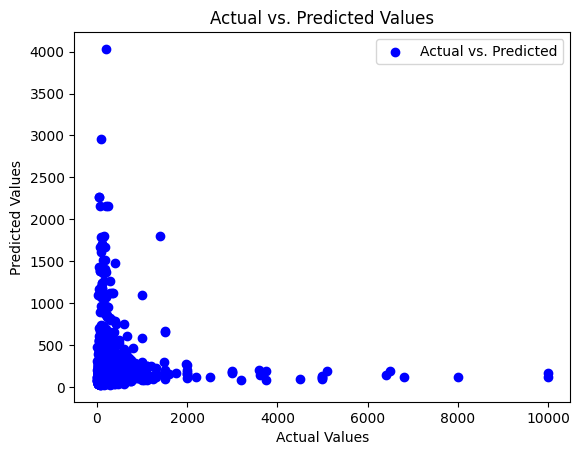

In [40]:
import matplotlib.pyplot as plt

plt.scatter(y_test, prediction, color='blue', label='Actual vs. Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()

In [41]:
# Creating and fitting random regression model

from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor(n_estimators=10, random_state=1)  # Adjust n_estimators as needed
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=1)

In [42]:
y_pred = rf_regressor.predict(X_test)

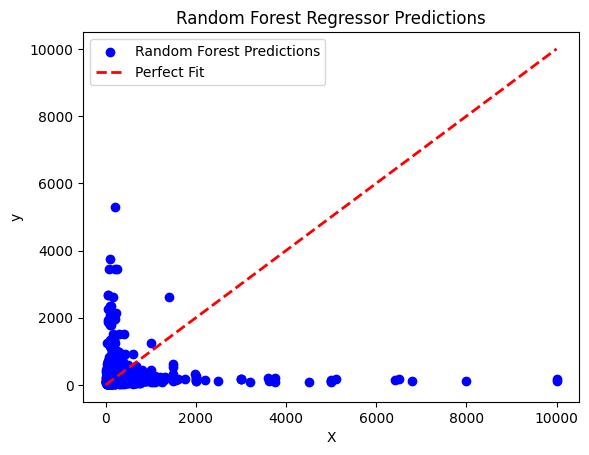

In [43]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, color='blue', label='Random Forest Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', lw=2, label='Perfect Fit')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Random Forest Regressor Predictions')
plt.legend()
plt.show()


Decison_Tree

In [44]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X, y)

DecisionTreeRegressor(random_state=0)

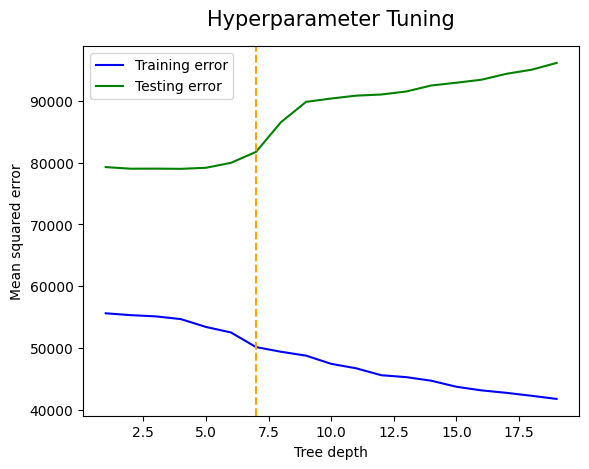

In [45]:
from sklearn.metrics import mean_squared_error as mse

max_depths = range(1, 20)
training_error = []
for max_depth in max_depths:
    model_1 = DecisionTreeRegressor(max_depth=max_depth)
    model_1.fit(X, y)
    training_error.append(mse(y, model_1.predict(X)))

testing_error = []
for max_depth in max_depths:
    model_2 = DecisionTreeRegressor(max_depth=max_depth)
    model_2.fit(X_train, y_train)
    testing_error.append(mse(y_test, model_2.predict(X_test)))

plt.plot(max_depths, training_error, color='blue', label='Training error')
plt.plot(max_depths, testing_error, color='green', label='Testing error')
plt.xlabel('Tree depth')
plt.axvline(x=7, color='orange', linestyle='--')
plt.annotate('optimum = 7', xy=(7.5, 1.17), color='red')
plt.ylabel('Mean squared error')
plt.title('Hyperparameter Tuning', pad=15, size=15)
plt.legend()
plt.savefig('error.png')

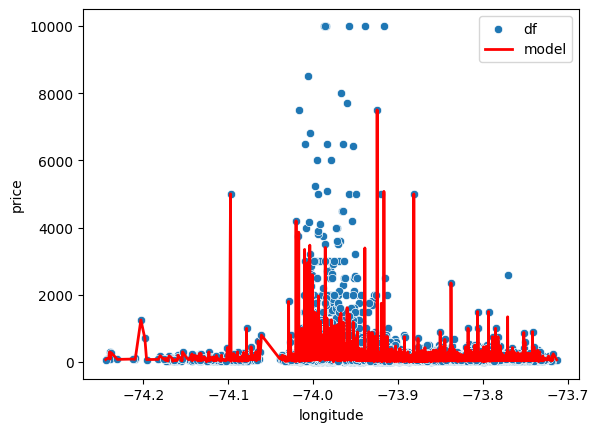

In [46]:
import seaborn as sns

sns.scatterplot(x=df['longitude'],
                y=df['price'],
                label='df')

plt.plot(df['longitude'].sort_values(),
         regressor.predict(df['longitude'].sort_values().to_frame()),
         color='red', label='model',
         linewidth=2)

plt.legend()

plt.savefig('model.png')